# 1. Aprendizaje supervisado, Clasificación, Dataset Iris

¿Cuál es el problema de clasificación?:
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [30]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Cargar datos desde CSV
iris = pd.read_csv('data/data_iris.csv')

In [32]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
# Dividir los datos en características (X) y variable objetivo (y)
X = iris.drop('variety', axis=1)
y = iris['variety']

In [34]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

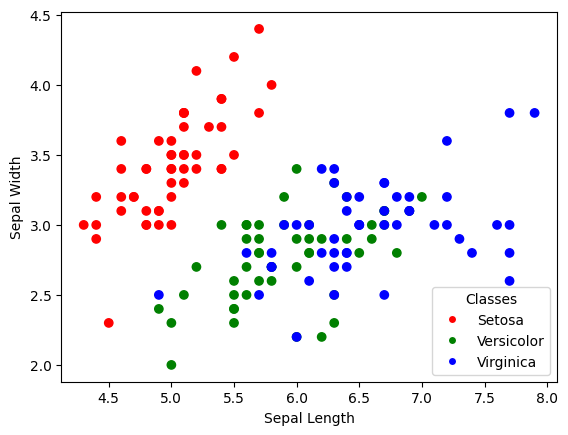

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde CSV
iris = pd.read_csv('data/data_iris.csv')

# Mapear variedades a colores
color_map = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los puntos
scatter = ax.scatter(iris['sepal.length'], iris['sepal.width'], c=iris['variety'].map(color_map))

# Establecer etiquetas de los ejes
ax.set(xlabel='Sepal Length', ylabel='Sepal Width')

# Crear leyenda manualmente
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for label, color in color_map.items()]
ax.legend(handles=legend_elements, loc="lower right", title="Classes")

plt.show()


In [37]:
# Dividir dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.size
X_test.size

120

- Algoritmo Regresión Logística

In [39]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Ver los coeficientes y el término de intercepción
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
model.coef_.size

Coeficientes: [[-0.39340204  0.96258576 -2.37510761 -0.99874603]
 [ 0.50840364 -0.25486503 -0.21301366 -0.77575487]
 [-0.1150016  -0.70772072  2.58812127  1.77450091]]
Intercepto: [  9.00834562   1.86927965 -10.87762527]


12

In [41]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [42]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

Precisión del modelo de regresión logística en el conjunto de prueba: 1.00


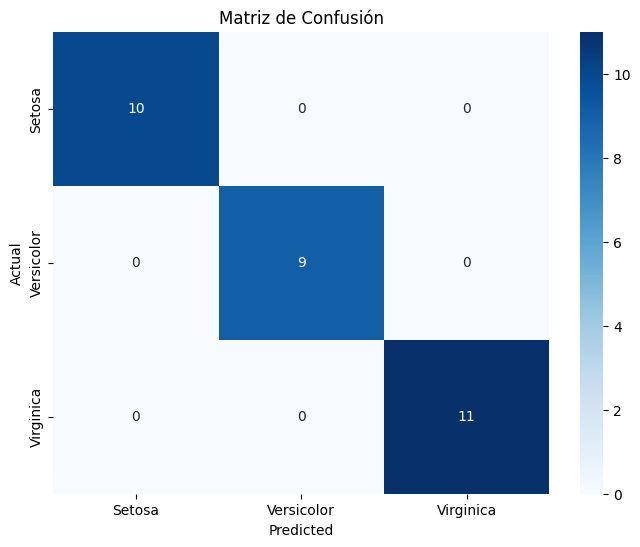

In [43]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [44]:
from sklearn.metrics import classification_report

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print("Reporte de Clasificación:")
print(report)


Reporte de Clasificación:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- Máquinas de soporte vectorial

In [45]:
from sklearn.svm import SVC

In [46]:
# Inicializar y entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [47]:
# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

In [48]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo SVM:", accuracy)

Accuracy del modelo SVM: 1.0


Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


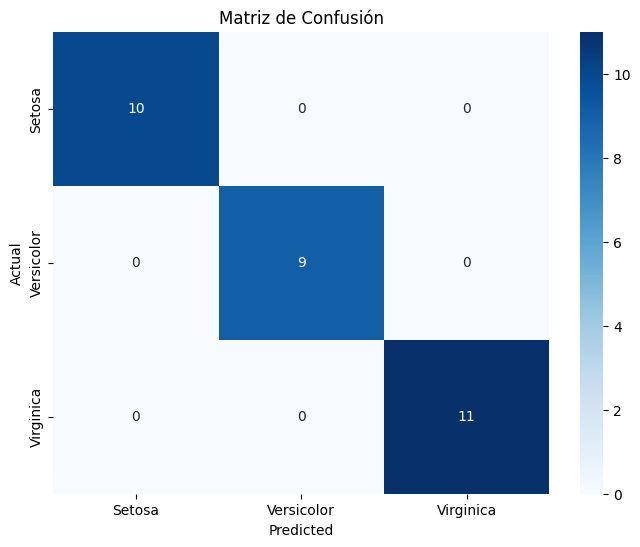

Reporte de Clasificación:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print("Reporte de Clasificación:")
print(report)

- Arbol de decision

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Inicializar y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Árbol de Decisión:", accuracy)


Accuracy del modelo de Árbol de Decisión: 1.0


Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


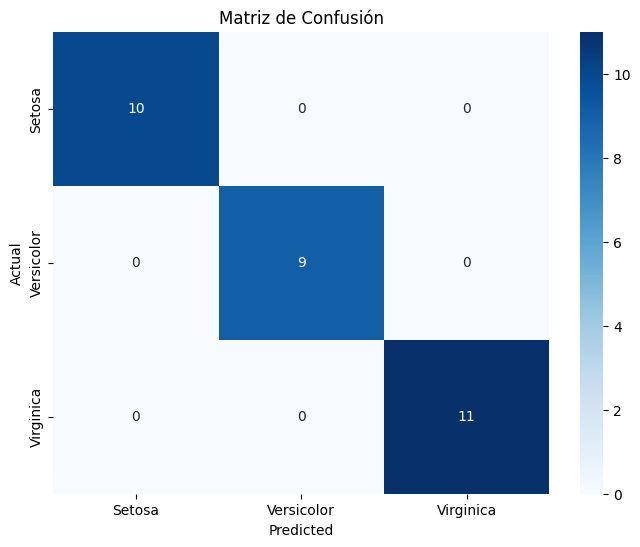

Reporte de Clasificación:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print("Reporte de Clasificación:")
print(report)

- Método Ensemble: Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier

In [54]:
# Inicializar y entrenar el modelo de ensamble Bagging con un árbol de decisión
bagging_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Ensamble Bagging con Árbol de Decisión:", accuracy)


Accuracy del modelo de Ensamble Bagging con Árbol de Decisión: 0.9407407407407408


Matriz de Confusión:
[[48  0  0]
 [ 0 40  4]
 [ 0  4 39]]


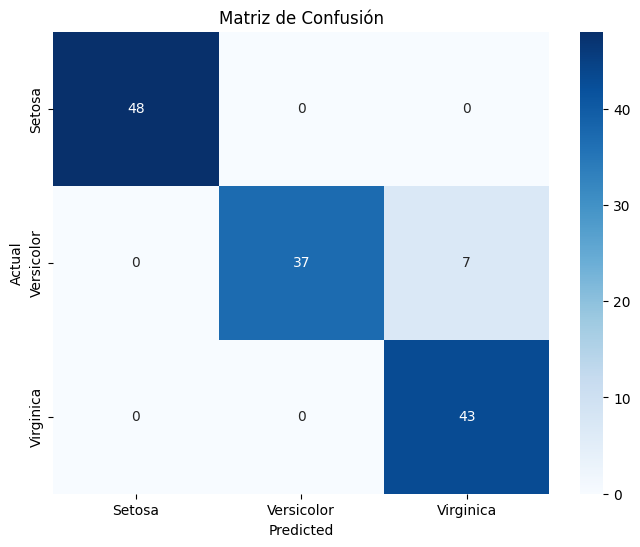

In [ ]:

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        48
  Versicolor       0.91      0.91      0.91        44
   Virginica       0.91      0.91      0.91        43

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135

